In [114]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime
import time

data = [json.loads(line) for line in open('21_aug_device1_1.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('21_aug_device76.csv')


FileNotFoundError: [Errno 2] No such file or directory: '21_aug_device1_1.json'

In [6]:
data = [json.loads(line) for line in open('21_aug_device61.json', 'r')]
df2 = json_normalize(data)
t= []
epoch_time = df2['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df2 = df2.drop(columns = {'receivedTimestamp', 'key'})
df2.insert(0, 'Date Time',time_formatted)
df2.tail()
df2.to_csv('21_aug_device61.csv')


<ipython-input-6-9229fffd7de0>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data)


In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime
import time


In [3]:
aero = pd.read_csv('Aeroqual_data//aeroqual210821.csv')
df1 = pd.read_csv('21_aug_device76.csv')
df2 = pd.read_csv('21_aug_device61.csv')

In [4]:
print(aero.dtypes)
print(df1.dtypes)
print(df2.dtypes)

Date Time        object
 Monitor ID       int64
 Location ID      int64
 NO2(ppm)       float64
dtype: object
Unnamed: 0                  int64
Date Time                  object
data.temp_c               float64
data.hum_prcnt            float64
data.press_hpa            float64
data.eq_db                float64
data.onesmin_db           float64
data.onesmax_db           float64
data.co_ppm                 int64
data.no2_ppb                int64
data.co_mv                  int64
data.no2_mv                 int64
data.x_g                  float64
data.y_g                  float64
data.z_g                  float64
data.x_raw                  int64
data.y_raw                  int64
data.z_raw                  int64
data.lux_lx               float64
data.uv_mwpm2             float64
data.nc0p5_npcm3          float64
data.nc1p0_npcm3          float64
data.nc2p5_npcm3          float64
data.nc4p0_npcm3          float64
data.nc10p0_npcm3         float64
data.mc1p0_ugpm3          float64
data.m

In [5]:
print(len(aero))
print(len(df1))
print(len(df2))

398
9542
3526


In [6]:
print(aero.head())
print(df1.head())

print(df2.head())

           Date Time   Monitor ID   Location ID   NO2(ppm)
0  19 Aug 2021 11:21            1             1      0.011
1  19 Aug 2021 11:22            1             1      0.006
2  19 Aug 2021 11:23            1             1      0.010
3  19 Aug 2021 11:24            1             1      0.012
4  19 Aug 2021 11:25            1             1      0.014
   Unnamed: 0            Date Time  data.temp_c  data.hum_prcnt  \
0           0  2021-07-19 15:00:43    30.540001       55.152000   
1           1  2021-07-19 15:00:12    30.730000       54.738998   
2           2  2021-07-19 15:01:14    30.430000       55.417000   
3           3  2021-07-19 15:03:49    30.330000       55.816002   
4           4  2021-07-19 15:04:20    30.290001       56.027000   

   data.press_hpa  data.eq_db  data.onesmin_db  data.onesmax_db  data.co_ppm  \
0      935.490479   41.802673        39.707294        53.231300          464   
1      935.488708   40.899525        39.114651        43.748398          461   
2  

In [7]:
aero['Date Time'] = pd.to_datetime(aero['Date Time'], dayfirst = True)
df1['Date Time'] = pd.to_datetime(df1['Date Time'], yearfirst = True)
df1.set_index("Date Time", inplace = True)
DF1 = df1.resample('T').mean().round(3)
df2['Date Time'] = pd.to_datetime(df2['Date Time'], yearfirst = True)
df2.set_index("Date Time", inplace = True)
DF2 = df2.resample('T').mean().round(3)

In [8]:
D1 = pd.merge(aero, DF1, on = 'Date Time', how = 'inner')
D1 = D1.dropna()
D2 = pd.merge(aero, DF2, on = 'Date Time', how = 'inner')
D2 = D2.dropna()

print(len(D1))
print(len(D2))

286
18


In [9]:
D1.to_csv('device1.csv')

In [10]:
print(D1.head())
print(D2.head())

             Date Time   Monitor ID   Location ID   NO2(ppm)  Unnamed: 0  \
0  2021-08-19 11:21:00            1             1      0.011      7984.5   
1  2021-08-19 11:22:00            1             1      0.006      7986.5   
2  2021-08-19 11:23:00            1             1      0.010      7988.5   
11 2021-08-19 11:32:00            1             1      0.008      7990.0   
12 2021-08-19 11:33:00            1             1      0.000      7991.5   

    data.temp_c  data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0        35.695          39.449         938.045      58.665           41.994   
1        34.510          41.587         937.927      56.919           41.756   
2        33.770          43.105         937.933      58.127           43.612   
11       31.670          49.693         938.379      63.525           56.930   
12       31.750          49.538         938.376      60.851           57.067   

    ...  data.leds_on  data.code_version  data.gps_avg_snr  \


In [11]:
list(D1)

['Date Time',
 ' Monitor ID',
 ' Location ID',
 ' NO2(ppm)',
 'Unnamed: 0',
 'data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_stren

In [12]:
D1 = D1.drop(columns= {' Monitor ID', ' Location ID', 'Unnamed: 0','data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db', 'data.x_g','data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um', 'data.ozone_volt_mv',
 'data.tvoc_ppb','data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data.wifi_strength_asl','data.location.acc',
 'data.timestamp'})

In [13]:
D2 = D2.drop(columns= {' Monitor ID', ' Location ID', 'Unnamed: 0','data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db', 'data.x_g','data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um', 'data.ozone_volt_mv',
 'data.tvoc_ppb','data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data.wifi_strength_asl','data.location.acc',
 'data.timestamp'})

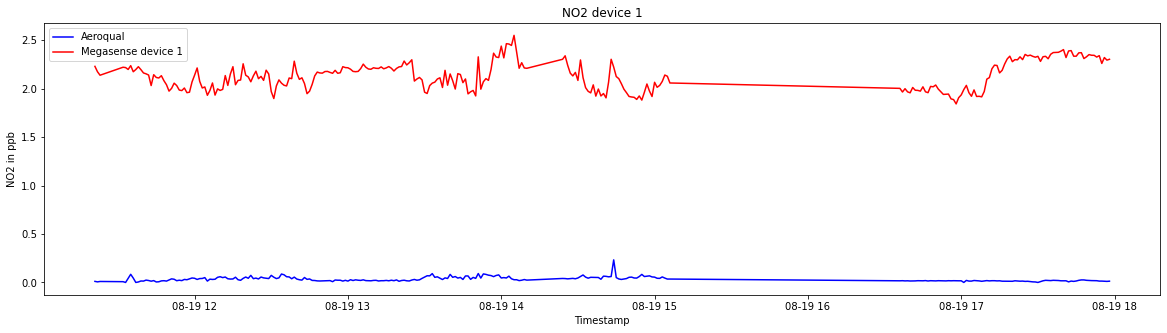

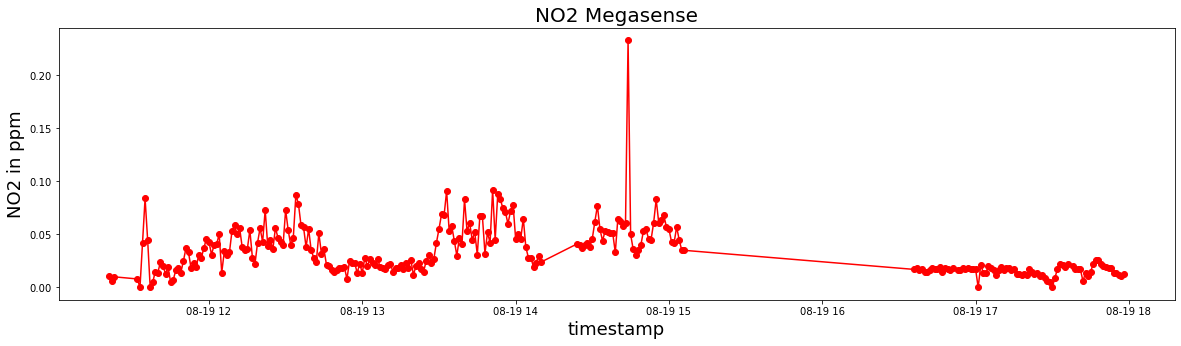

Text(0.5, 1.0, 'NO2 Aeroqual')

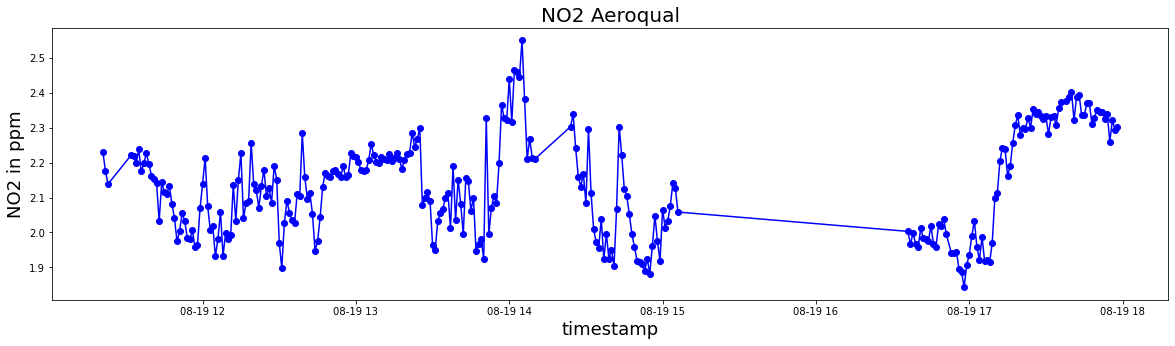

In [14]:
import matplotlib.pyplot as plt

x = D1['Date Time']
y1 = D1[' NO2(ppm)']
y2 = D1['data.no2_ppb']/1000

fig = plt.figure(figsize = (20,5))
plt.plot(x, y1,'-b')
plt.plot(x, y2, '-r')
plt.xlabel('Timestamp')
plt.ylabel('NO2 in ppb')
plt.title('NO2 device 1')
plt.legend(['Aeroqual', 'Megasense device 1'])
plt.show()
fig= plt.figure(figsize=(20,5))
# plotting points as a scatter plot
plt.plot(x, y1, '-or')
plt.xlabel('timestamp', fontsize=18)
plt.ylabel('NO2 in ppm', fontsize=18)
#plt.legend(["Megasense", "Aeroqual"])
plt.title('NO2 Megasense', fontsize=20)
plt.show()

fig= plt.figure(figsize=(20,5))
plt.plot(x, y2, '-ob')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('NO2 in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('NO2 Aeroqual', fontsize=20)

Text(0.5, 0, 'lag of y2 relative to y1')

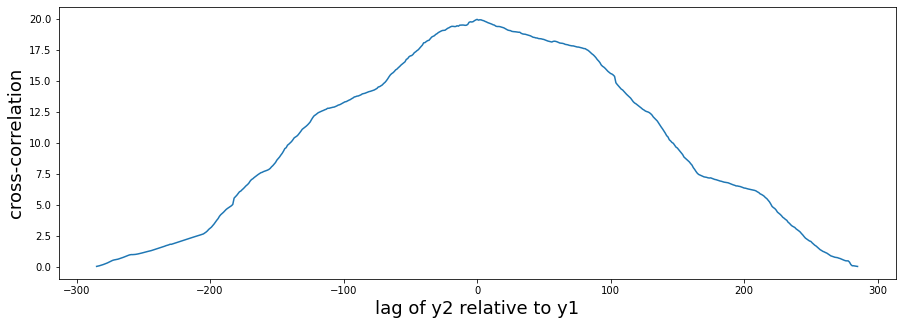

In [22]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
npts = len(D1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2, y1, mode='full')
cor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccov)
plt.ylabel('cross-correlation',fontsize =18)
plt.xlabel('lag of y2 relative to y1', fontsize = 18)

max correlation is at lag -40
max correlation is  0.323
Pearsons correlation: -0.182
MSE NO2:  4.430522553020203
MAE NO2:  2.099596153846154
RMSE NO2:  2.104880650540596


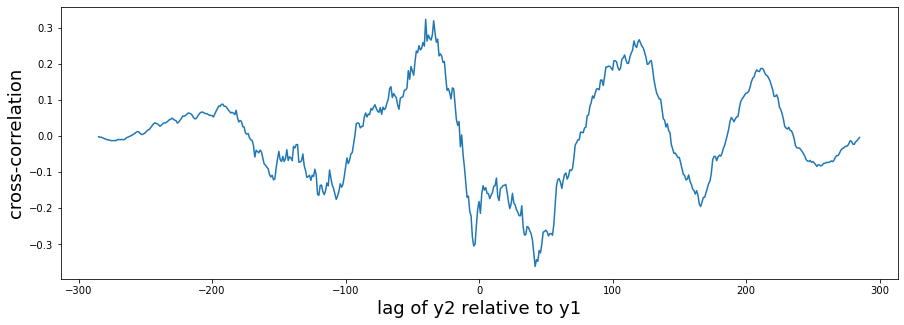

In [24]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
npts = len(y1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation',fontsize =18)
plt.xlabel('lag of y2 relative to y1', fontsize = 18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y1, y2)
MAE = mean_absolute_error(y1, y2)
print("MSE NO2: ", MSE)
print("MAE NO2: ", MAE)
print("RMSE NO2: ", np.sqrt(mean_squared_error(y1, y2)))

In [29]:
D1['data.no2_ppb_shift'] = D1['data.no2_ppb'].shift(34)
D1.head()
print(len(D1))

246


<ipython-input-29-d85576a72e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['data.no2_ppb_shift'] = D1['data.no2_ppb'].shift(34)


max correlation is at lag -6
max correlation is  0.474
Pearsons correlation: 0.457
MSE NO2:  4.320870871258911
MAE NO2:  2.0749040896226414
RMSE NO2:  2.0786704575903587


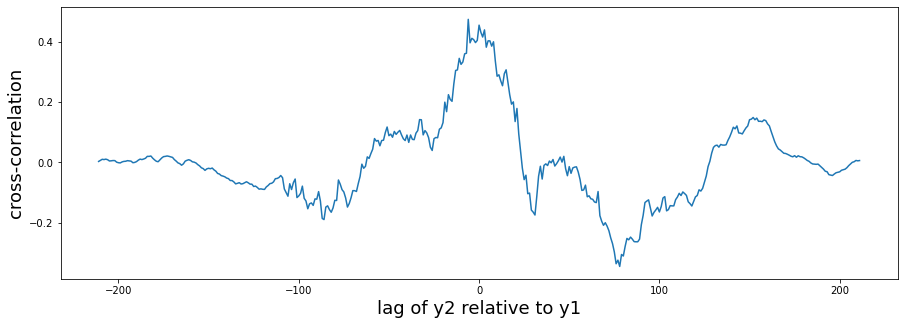

In [30]:
D1 = D1.dropna()
x = D1['Date Time']
y1 = D1[' NO2(ppm)']
#y2 = D1['data.no2_ppb']/1000
y2 = D1['data.no2_ppb_shift']/1000


npts = len(D1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation',fontsize =18)
plt.xlabel('lag of y2 relative to y1', fontsize = 18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y1, y2)
MAE = mean_absolute_error(y1, y2)
print("MSE NO2: ", MSE)
print("MAE NO2: ", MAE)
print("RMSE NO2: ", np.sqrt(mean_squared_error(y1, y2)))

In [26]:
D1

,Date Time,NO2(ppm),data.temp_c,data.hum_prcnt,data.co_ppm,data.no2_ppb,data.co_mv,data.no2_mv,data.ozone_ppm,data.batt_prcnt,data.location.lat,data.location.lon,data.no2_ppb_shift
0,2021-08-19 11:21:00,0.011,35.695,39.449,519.5,2230.0,1953.0,1125.0,61.5,95.5,17.446,78.350,NaN
1,2021-08-19 11:22:00,0.006,34.510,41.587,512.0,2174.5,1934.5,1105.5,79.5,93.5,17.446,78.350,NaN
2,2021-08-19 11:23:00,0.010,33.770,43.105,510.5,2138.5,1928.5,1100.5,120.0,91.0,17.446,78.350,NaN
11,2021-08-19 11:32:00,0.008,31.670,49.693,507.0,2221.0,1919.0,1124.0,92.0,87.0,17.445,78.350,NaN
12,2021-08-19 11:33:00,0.000,31.750,49.538,507.5,2217.5,1925.0,1119.0,83.5,87.0,17.445,78.350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2021-08-19 17:54:00,0.014,35.605,39.976,515.0,2340.5,1946.0,1151.5,65.0,100.0,17.460,78.334,2242.5
394,2021-08-19 17:55:00,0.014,35.570,39.887,512.0,2260.0,1927.0,1135.5,62.5,100.0,17.460,78.334,2239.0
395,2021-08-19 17:56:00,0.012,35.550,39.915,516.0,2321.0,1944.0,1154.0,71.0,100.0,17.460,78.334,2162.5
396,2021-08-19 17:57:00,0.011,35.520,39.951,512.0,2294.5,1934.0,1142.0,58.5,100.0,17.460,78.334,2189.0


252
max correlation is at lag -6
max correlation is  0.367
Pearsons correlation: -0.182
MSE NO2:  4.430522553020203
MAE NO2:  2.099596153846154
RMSE NO2:  2.104880650540596


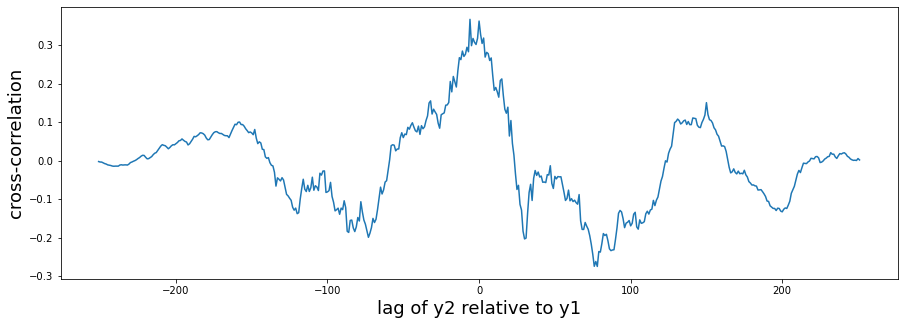

In [27]:
y2_1 = D1['data.no2_ppb'].iloc[:-34]/1000
y1_1 = D1[' NO2(ppm)'].iloc[34:]
#x = D1_1['Date Time'].iloc[:len(y2)]

#y2 = D1['data.no2_ppb']/1000

print(len(y2_1))

npts = len(y2_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2_1 - y2.mean(), y1_1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation',fontsize =18)
plt.xlabel('lag of y2 relative to y1', fontsize = 18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y1, y2)
MAE = mean_absolute_error(y1, y2)
print("MSE NO2: ", MSE)
print("MAE NO2: ", MAE)
print("RMSE NO2: ", np.sqrt(mean_squared_error(y1, y2)))

In [32]:
len(D1)*70/100

148.4

In [35]:
D1 = D1.dropna()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor
msk = (np.random.rand(len(D1)) < 0.7)
train = df1[:149]
test = df1[149:]
regr = linear_model.LinearRegression()

train_x1 = np.asanyarray(train[['data.no2_ppb_shift']])
train_y1 = np.asanyarray(train[[' NO2(ppm)']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['data.no2_ppb_shift']])
test_y1 = np.asanyarray(test[[' NO2(ppm)']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y1))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')


KeyError: "None of [Index(['data.no2_ppb_shift'], dtype='object')] are in the [columns]"

In [21]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_x1)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y1)

#predicting

pred_y = pol_reg.predict(poly_reg.fit_transform(test_x1))

print('Polynomial linear regression MAE:', metrics.mean_absolute_error(test_y1, pred_y))
print('Polynomial linear regression MSE:', metrics.mean_squared_error(test_y1, pred_y))
print('Polynomial linear regression RMSE:', np.sqrt(metrics.mean_squared_error(test_y1, pred_y)))



test_score = r2_score(test_y1, pred_y)
spearman = spearmanr(test_y1, pred_y)
#pearson = pearsonr(test_y, pred_y)

print(f'Polynomial linear regression R-2 score: {test_score:>5.3}')
print(f'Polynomial linear regression Spearman correlation: {spearman[0]:.3}')
#print(f'Random Forest Pearson correlation: {pearson[0]:.3}')



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [92]:

train_x1 = np.asanyarray(train[['data.no2_ppb_shift', 'data.temp_c']])
train_y1 = np.asanyarray(train[[' NO2(ppm)']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['data.no2_ppb_shift', 'data.temp_c']])
test_y1 = np.asanyarray(test[[' NO2(ppm)']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y1))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')


Coefficients:  [[ 3.19046094e-05 -8.14511474e-03]]
Intercept:  [0.23847479]
R2  0.5821732265974275
MAE  0.011058670043237833
MSE  0.00024924696821231274
RMSE  0.015787557385875523
variance score = 0.613082259445626
Test data Spearman correlation: 0.829


In [93]:
train_x1 = np.asanyarray(train[['data.no2_ppb_shift', 'data.hum_prcnt']])
train_y1 = np.asanyarray(train[[' NO2(ppm)']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['data.no2_ppb_shift', 'data.hum_prcnt']])
test_y1 = np.asanyarray(test[[' NO2(ppm)']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y1))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')


Coefficients:  [[3.79262746e-05 3.68056853e-03]]
Intercept:  [-0.21305899]
R2  0.5532214374896126
MAE  0.011653363734655293
MSE  0.00026651763184327255
RMSE  0.01632536773990934
variance score = 0.5919061792206555
Test data Spearman correlation: 0.821


In [94]:
train_x1 = np.asanyarray(train[['data.no2_ppb_shift', 'data.ozone_ppm']])
train_y1 = np.asanyarray(train[[' NO2(ppm)']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['data.no2_ppb_shift', 'data.ozone_ppm']])
test_y1 = np.asanyarray(test[[' NO2(ppm)']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y1))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

Coefficients:  [[7.44410248e-05 5.06901664e-04]]
Intercept:  [-0.1537503]
R2  0.5368825378671143
MAE  0.013459929874478286
MSE  0.00027626430547471374
RMSE  0.016621200482357275
variance score = 0.5581228736143162
Test data Spearman correlation: 0.801


In [95]:
train_x1 = np.asanyarray(train[['data.no2_ppb_shift', 'data.temp_c','data.ozone_ppm']])
train_y1 = np.asanyarray(train[[' NO2(ppm)']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['data.no2_ppb_shift', 'data.temp_c', 'data.ozone_ppm']])
test_y1 = np.asanyarray(test[[' NO2(ppm)']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y1))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

Coefficients:  [[ 3.05307741e-05 -7.59855828e-03  1.87847395e-04]]
Intercept:  [0.2101662]
R2  0.614564743348216
MAE  0.01035309647691516
MSE  0.00022992439756853628
RMSE  0.015163258144888793
variance score = 0.6474506552612772
Test data Spearman correlation: 0.842


In [96]:
train_x1 = np.asanyarray(train[['data.no2_ppb_shift', 'data.temp_c', 'data.hum_prcnt','data.ozone_ppm']])
train_y1 = np.asanyarray(train[[' NO2(ppm)']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['data.no2_ppb_shift', 'data.temp_c','data.hum_prcnt', 'data.ozone_ppm']])
test_y1 = np.asanyarray(test[[' NO2(ppm)']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y1))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

Coefficients:  [[3.96931728e-05 3.89401763e-03 5.12393379e-03 1.98159394e-04]]
Intercept:  [-0.42583175]
R2  0.5777132701120975
MAE  0.011179941724857935
MSE  0.00025190747419969785
RMSE  0.015871593310052327
variance score = 0.6217619117195443
Test data Spearman correlation: 0.832


In [51]:
len(D1)

126

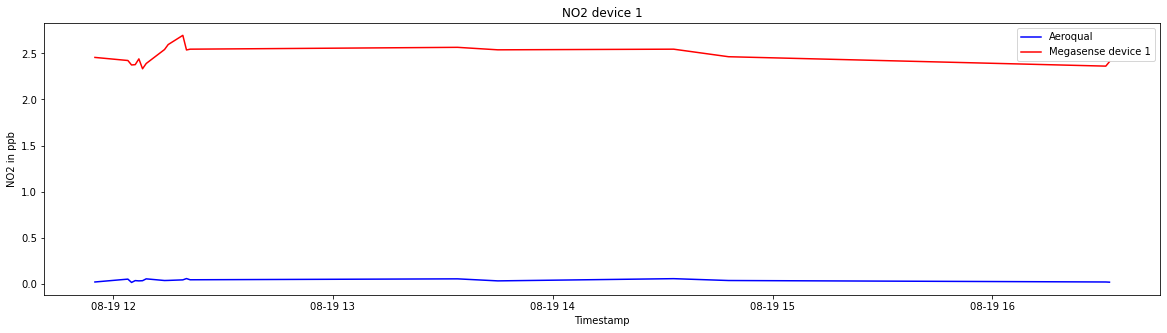

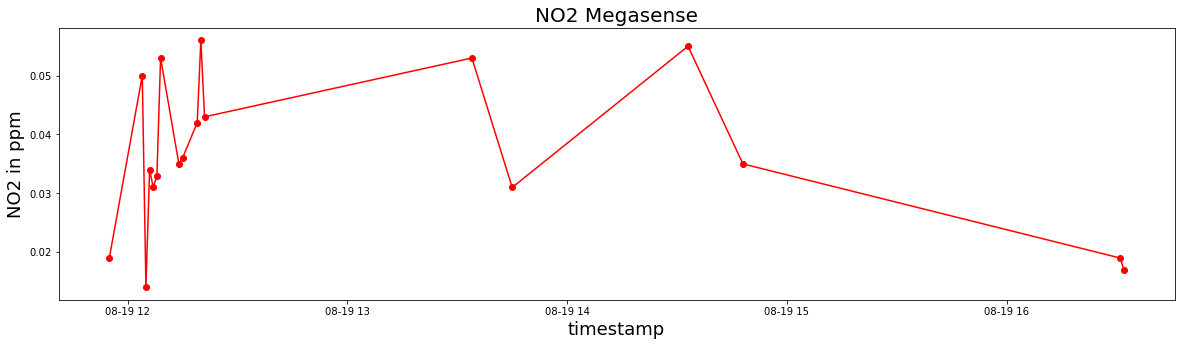

Text(0.5, 1.0, 'NO2 Aeroqual')

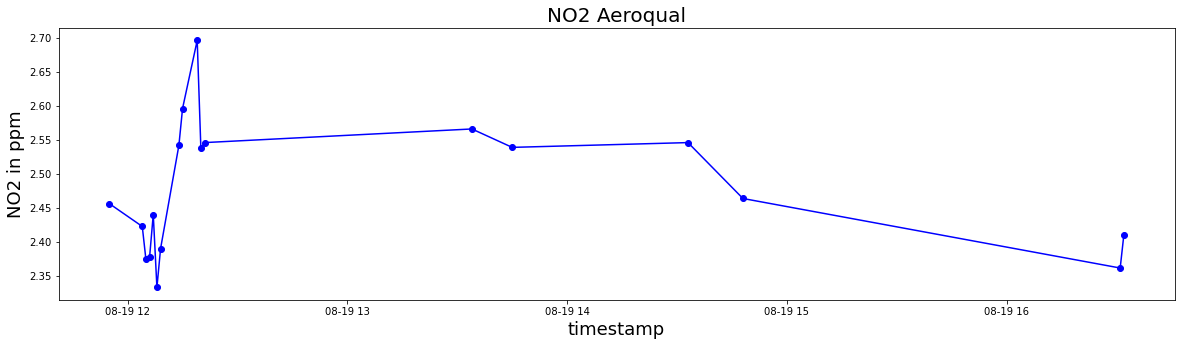

In [52]:
x = D2['Date Time']
y1 = D2[' NO2(ppm)']
y2 = D2['data.no2_ppb']/1000

fig = plt.figure(figsize = (20,5))
plt.plot(x, y1,'-b')
plt.plot(x, y2, '-r')
plt.xlabel('Timestamp')
plt.ylabel('NO2 in ppb')
plt.title('NO2 device 1')
plt.legend(['Aeroqual', 'Megasense device 1'])
plt.show()
fig= plt.figure(figsize=(20,5))
# plotting points as a scatter plot
plt.plot(x, y1, '-or')
plt.xlabel('timestamp', fontsize=18)
plt.ylabel('NO2 in ppm', fontsize=18)
#plt.legend(["Megasense", "Aeroqual"])
plt.title('NO2 Megasense', fontsize=20)
plt.show()

fig= plt.figure(figsize=(20,5))
plt.plot(x, y2, '-ob')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('NO2 in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('NO2 Aeroqual', fontsize=20)

max correlation is at lag 0
max correlation is  0.415
Pearsons correlation: 0.440
MSE NO2:  5.968599486111111
MAE NO2:  2.441416666666667
RMSE NO2:  2.443071731675333


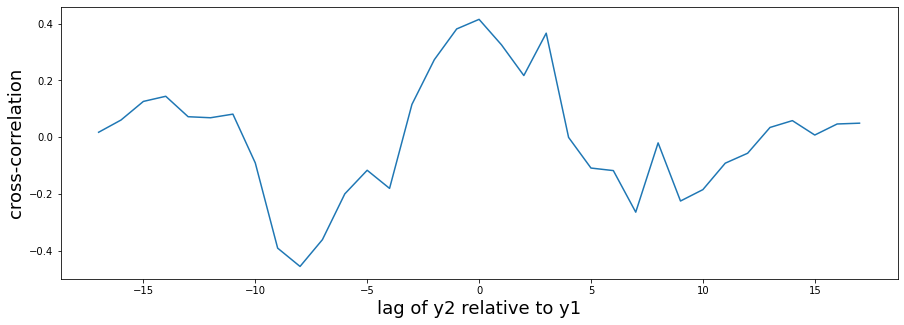

In [53]:
npts = len(D2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation',fontsize =18)
plt.xlabel('lag of y2 relative to y1', fontsize = 18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y1, y2)
MAE = mean_absolute_error(y1, y2)
print("MSE NO2: ", MSE)
print("MAE NO2: ", MAE)
print("RMSE NO2: ", np.sqrt(mean_squared_error(y1, y2)))

In [16]:
len(D1)

286